In [1]:
#this was used for me to learn a bit more about how to use Juypyter Notebooks 
import pandas as pd

In [4]:
df_sales= pd.read_excel('supermarket_sales.xlsx')
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [5]:
#make a pivot table and add an aggregate function
df_sales.pivot_table(index='Gender', aggfunc="sum")

,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
Gender,,,,,,,,
Female,2869,3489.2,7994.425,167882.925,27687.24,159888.50,7994.425,2385.714286
Male,2641,3483.5,7384.944,155083.824,27984.89,147698.88,7384.944,2376.190476


In [8]:
#make a pivot table, add an aggreage function and select some columns
df_sales.pivot_table(index='Gender', 
                     values=['Quantity','Total'],
                     aggfunc="sum")

,Quantity,Total
Gender,,
Female,2869,167882.925
Male,2641,155083.824


In [11]:
#make a pivot table, that says how much male and female spend in each category
df_sales.pivot_table(index='Gender', 
                     columns='Product line',
                     values='Total',
                     aggfunc="sum")

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,27102.0225,30437.400,33170.9175,18560.9865,30036.8775,28574.7210
Male,27235.5090,23868.495,22973.9265,30632.7525,23825.0355,26548.1055


# makign visualizations with pivot tables

In [13]:
df_population=pd.read_csv('population_total.csv')

In [14]:
df_population

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [19]:
# drop null values
df_population.dropna(inplace=True)

In [21]:
#making pivot tables
df_pivot=df_population.pivot_table(index='year',columns='country',values='population')

In [23]:
#selecting some countries
df_pivot= df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [24]:
#showing pivot tables
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# Lineplot

<AxesSubplot:title={'center':'Population (1955-2020)'}, xlabel='Year', ylabel='Population'>

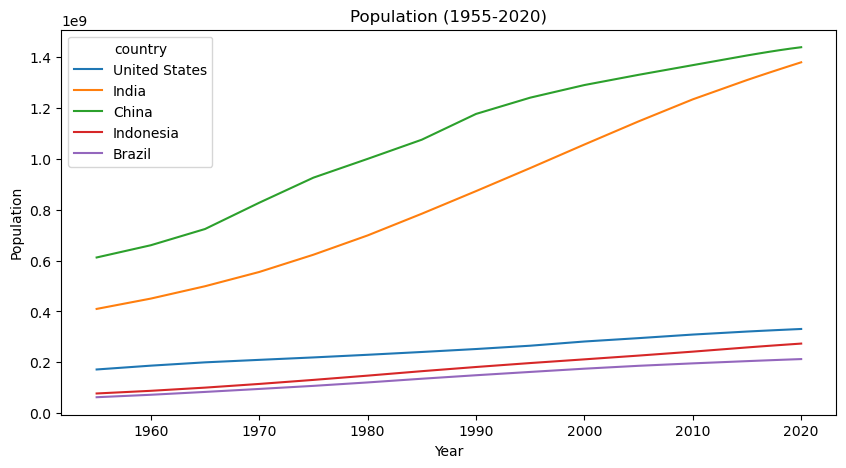

In [27]:
df_pivot.plot(kind='line',xlabel='Year', ylabel='Population', 
              title='Population (1955-2020)',
             figsize=(10,5))

# Barplot

## Single barplot

In [30]:
#selecintg one year (2020)
df_pivot_2020= df_pivot[df_pivot.index.isin([2020])]
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [32]:
#transpose dataframe from rows to columns or visaversa
df_pivot_2020=df_pivot_2020.T

<AxesSubplot:title={'center':'Population (2020)'}, xlabel='Year', ylabel='Population'>

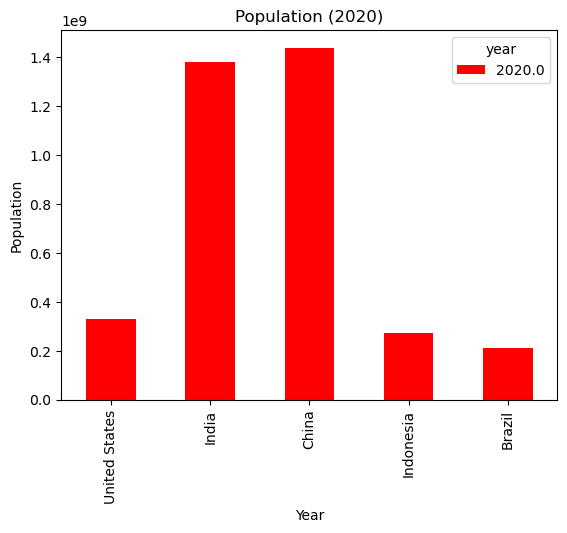

In [35]:
#making barplot
df_pivot_2020.plot(kind='bar',color='red',xlabel='Year', 
                   ylabel='Population', 
              title='Population (2020)')

## Barplot grouped by n variables

In [36]:
#selecting few years
df_pivot_sample= df_pivot[df_pivot.index.isin([1980,19190,2000,2010,2020])]
df_pivot_sample

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
2000.0,281710909.0,1.056576e+09,1.290551e+09,211513823.0,174790340.0
2010.0,309011475.0,1.234281e+09,1.368811e+09,241834215.0,195713635.0
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


<AxesSubplot:xlabel='year'>

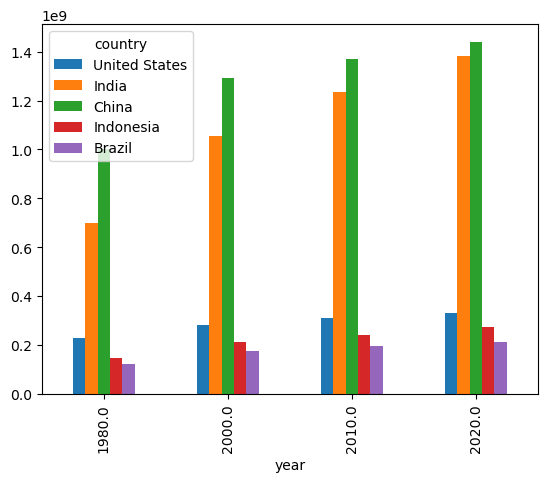

In [37]:
#making grouped barplot
df_pivot_sample.plot(kind='bar')

# Piecharts

In [40]:
#changin colum name
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)

<AxesSubplot:title={'center':'Population in % in 2020'}, ylabel='2020'>

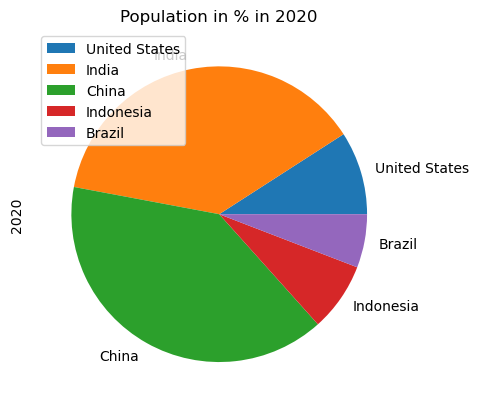

In [44]:
#making the plot
df_pivot_2020.plot(kind='pie', y='2020', title='Population in % in 2020')

# Importing matplotlib

In [46]:
import matplotlib.pyplot as plt

## Lineplot

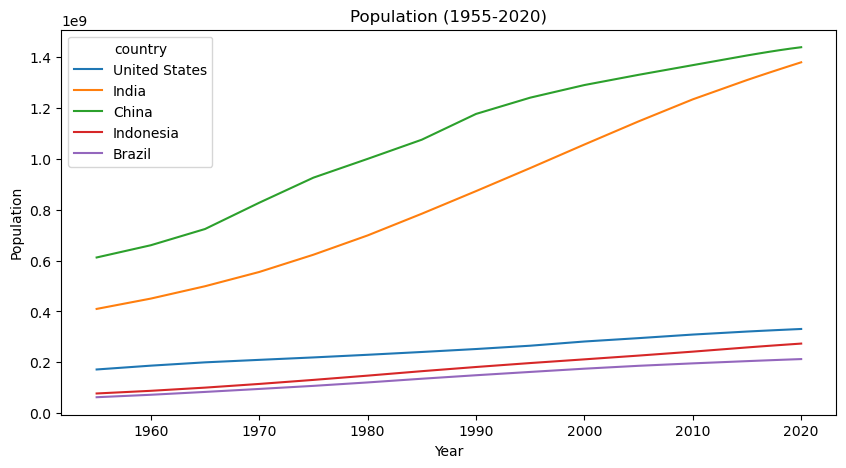

In [50]:
df_pivot.plot(kind='line',xlabel='Year', ylabel='Population', 
              title='Population (1955-2020)',
             figsize=(10,5))

#save plot
plt.savefig('my_test.png')
#show plot
plt.show()

In [53]:
df_pivot.to_excel('pivot_table.xlsx')